In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
bank_df = pd.read_csv('R5_External_USL_Qualitative_Bankruptcy.data.txt')
bank_df.dtypes

P      object
P.1    object
A      object
A.1    object
A.2    object
P.2    object
NB     object
dtype: object

In [3]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
P      249 non-null object
P.1    249 non-null object
A      249 non-null object
A.1    249 non-null object
A.2    249 non-null object
P.2    249 non-null object
NB     249 non-null object
dtypes: object(7)
memory usage: 13.7+ KB


In [4]:
bank_df.head()

,P,P.1,A,A.1,A.2,P.2,NB
0,N,N,A,A,A,N,NB
1,A,A,A,A,A,A,NB
2,P,P,P,P,P,P,NB
3,N,N,P,P,P,N,NB
4,A,A,P,P,P,A,NB


In [5]:
##X = bank_df.drop("NB")
##y = bank_df.pop("NB")

In [6]:
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

##Get all independent  features into a list to apply encoding
categorical_feature_mask = bank_df.dtypes==object
categorical_cols = bank_df.columns[categorical_feature_mask].tolist()
print(categorical_cols)

## Applying the LabelEncoding
le = LabelEncoder()
bank_df[categorical_cols] = bank_df[categorical_cols].apply(lambda col: le.fit_transform(col))


['P', 'P.1', 'A', 'A.1', 'A.2', 'P.2', 'NB']


In [7]:
bank_df.groupby('NB').NB.count()

NB
0    107
1    142
Name: NB, dtype: int64

In [8]:
bank_df.dtypes

P      int64
P.1    int64
A      int64
A.1    int64
A.2    int64
P.2    int64
NB     int64
dtype: object

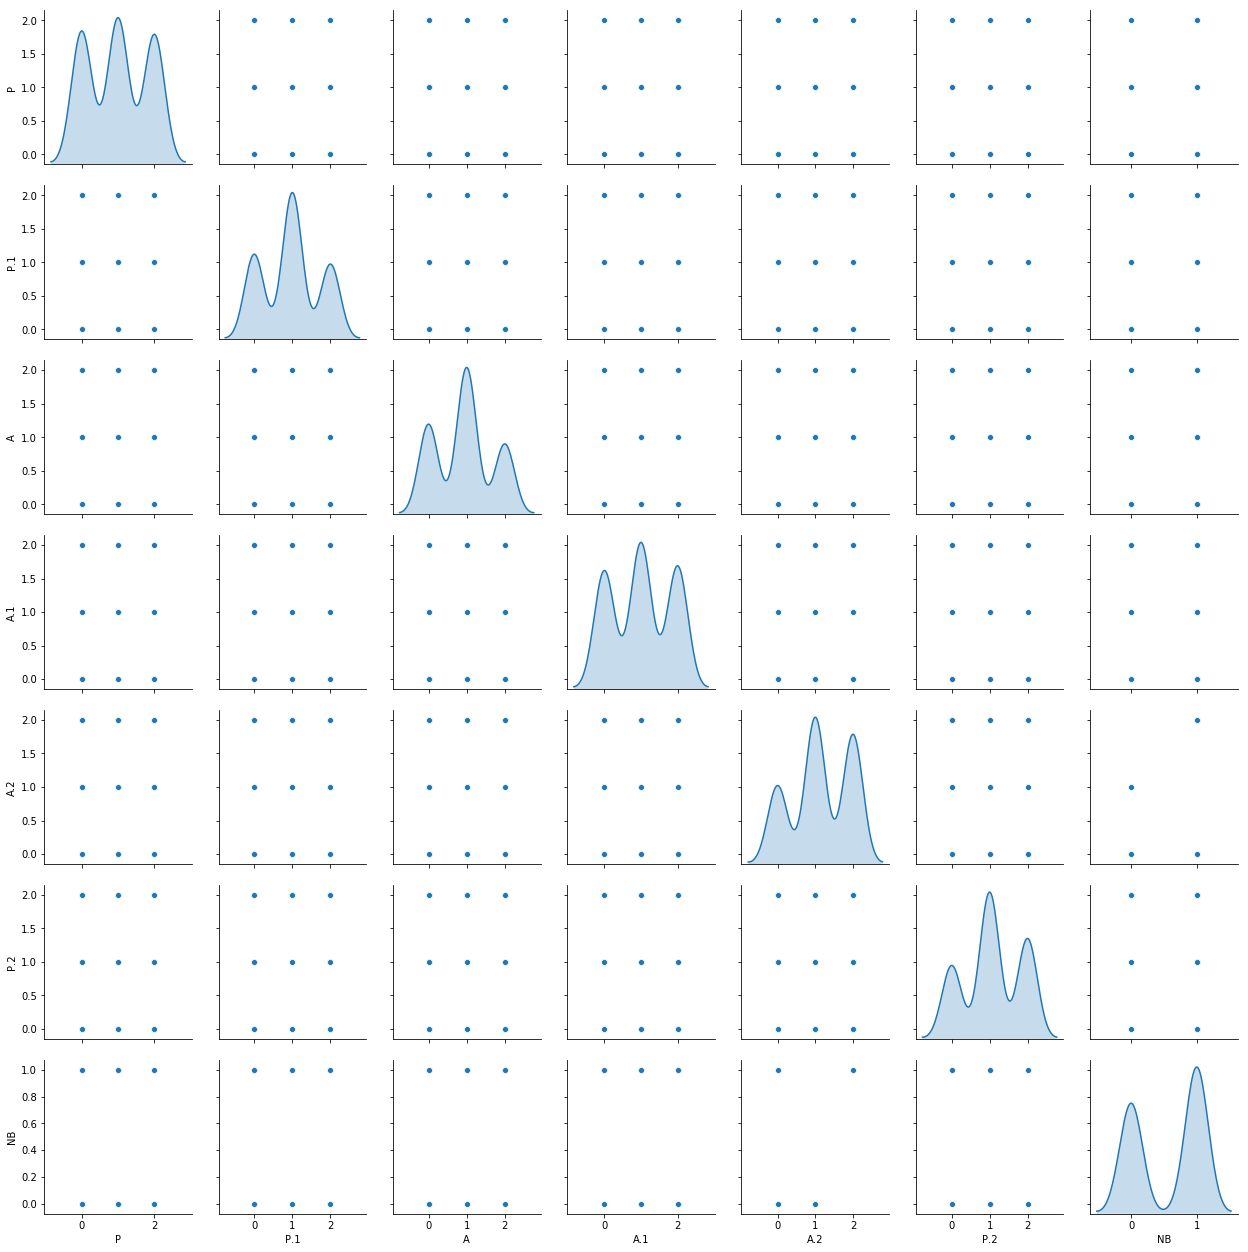

In [9]:
import seaborn as sns
sns.pairplot(bank_df, diag_kind='kde')

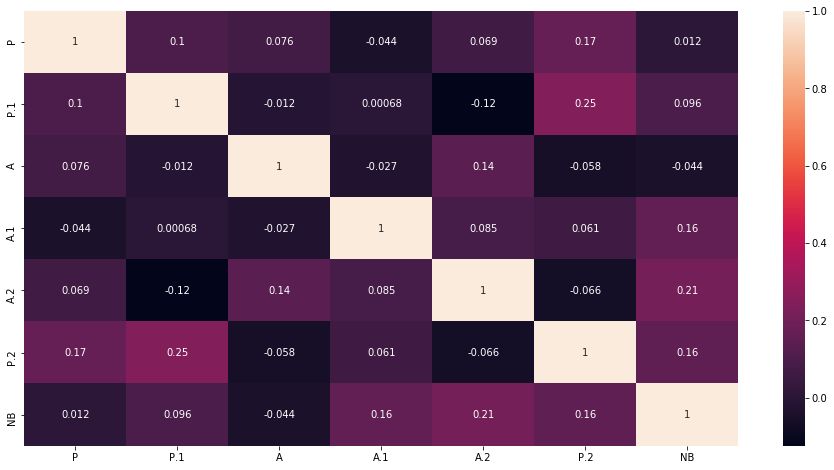

In [10]:
plt.figure(figsize=(16,8))
sns.heatmap(bank_df.corr(),annot=True)

In [11]:
bank_df.corr()

,P,P.1,A,A.1,A.2,P.2,NB
P,1.000000,0.103668,0.075684,-0.044304,0.068556,0.172394,0.011544
P.1,0.103668,1.000000,-0.011704,0.000680,-0.124622,0.248525,0.096230
A,0.075684,-0.011704,1.000000,-0.026931,0.143322,-0.058365,-0.043686
A.1,-0.044304,0.000680,-0.026931,1.000000,0.085074,0.060876,0.157229
A.2,0.068556,-0.124622,0.143322,0.085074,1.000000,-0.065977,0.210055
P.2,0.172394,0.248525,-0.058365,0.060876,-0.065977,1.000000,0.155539
NB,0.011544,0.096230,-0.043686,0.157229,0.210055,0.155539,1.000000


## EDA / Summary of the Dataset

1. There are 249 records  6 are independent and 1 is dependent , so total 7 features
2. There are no missing values, same is also given in the problem statement. Also revalidated using isNAN , isSum
3. Each of the 6 independent features have one of the 3 possible values  
    P=Positive,A-Average,N-negative
3. Independent variable are category in nature , dependent column are binary in nature
4. Applied LabelEncoding 
5. Heatmap and using corr function A,A1,A2 are -ve correct corelated with target column

# Separate the dependant variable from the rest of the train data 2 point

In [12]:
X=bank_df.drop('NB',axis=1)
y=bank_df['NB']

# Split the dataset into training and test data ( Take 80:20 ratio).

In [13]:
# splitting data into training and test set for independent attributes

from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.20, random_state=1)

# Apply PCA on the independent features of train data.

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca=PCA() # initialize PCA
pca.fit(X_train) # fit PCA on Train data

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pca.explained_variance_ratio_

array([0.22996019, 0.19939335, 0.1902145 , 0.15055907, 0.1230536 ,
       0.10681928])

In [16]:
pca.explained_variance_ratio_.sum()

1.0000000000000002

# Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance)

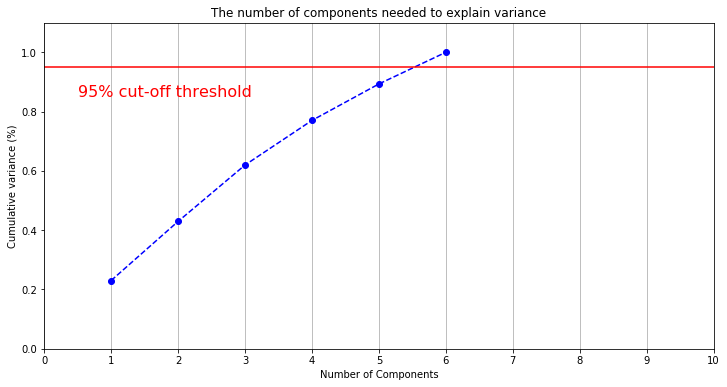

In [17]:
#% matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, 7, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [18]:
var_cum=np.zeros(X_train.columns.size) # array to hold cumulaite variance
var_cum=np.zeros(X_train.columns.size)
for i,v in enumerate(pca.explained_variance_/pca.explained_variance_.sum()*100):
    if i==0:
        var_cum[i]=v
    else:
        var_cum[i]=v+var_cum[i-1]
       

Text(0.5, 1.0, 'Elbow plot for Variance explained')

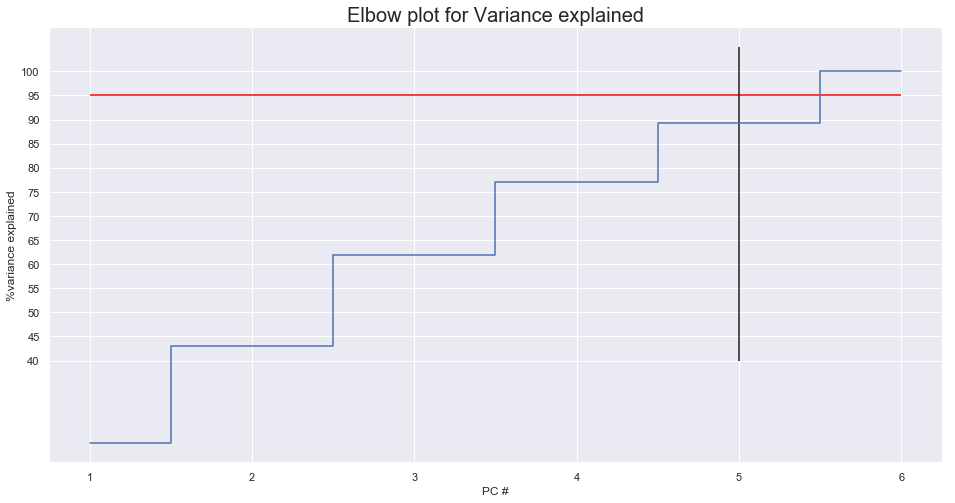

In [19]:
sns.set()
plt.figure(figsize=(16,8))
plt.step(x=np.arange(1,var_cum.size+1),y=var_cum, where= 'mid')
plt.yticks(np.arange(40,105,5))
plt.hlines(95,xmin=1,xmax=6,colors='red')
plt.vlines(5,ymin=40,ymax=105)
plt.xlabel('PC #')
plt.ylabel('%variance explained')
plt.title('Elbow plot for Variance explained',fontsize=20)

In [20]:
pca=PCA(n_components=5) # reinitialize PCA with 5 components as per the above graph suggests

In [21]:
X_tf_train=pca.fit_transform(X_train)
X_tf_train

array([[ 1.11346891e+00,  4.04333255e-01,  4.34973216e-02,
         5.89917603e-03,  2.53276477e-01],
       [ 3.42235039e-01, -5.17093323e-02, -9.26666235e-01,
         3.74128377e-01, -6.07583927e-01],
       [ 2.07299605e+00, -3.12290060e-01, -1.04381460e+00,
         5.62893320e-01, -5.76370791e-01],
       [-5.35648418e-01,  1.62705087e-02, -1.05606670e-01,
         2.45282377e-01,  3.80656750e-01],
       [ 2.90352336e-03, -7.56336334e-01, -5.20500332e-02,
        -9.40752212e-01, -4.54968022e-01],
       [-1.77728283e+00,  1.04638871e-01, -6.22146317e-01,
         7.97828701e-01, -1.31556305e+00],
       [-1.19988536e+00, -1.66605256e+00,  4.77665793e-01,
         1.09344643e+00,  2.71444294e-01],
       [-1.00498374e-01, -4.92261818e-01, -1.11089788e+00,
         1.28835707e+00, -5.24218774e-01],
       [-1.28165511e-01,  4.92701617e-01, -4.73042326e-01,
         5.58445500e-01, -1.44294333e+00],
       [ 1.52095181e+00,  8.80764364e-01, -3.23938334e-01,
         3.19062299e-01

In [22]:
X_train_5D=pd.DataFrame(X_tf_train,columns=['pc1','pc2','pc3','pc4','pc5']) # data frame with Transformed features
X_train_5D.head()

,pc1,pc2,pc3,pc4,pc5
0,1.113469,0.404333,0.043497,0.005899,0.253276
1,0.342235,-0.051709,-0.926666,0.374128,-0.607584
2,2.072996,-0.312290,-1.043815,0.562893,-0.576371
3,-0.535648,0.016271,-0.105607,0.245282,0.380657
4,0.002904,-0.756336,-0.052050,-0.940752,-0.454968


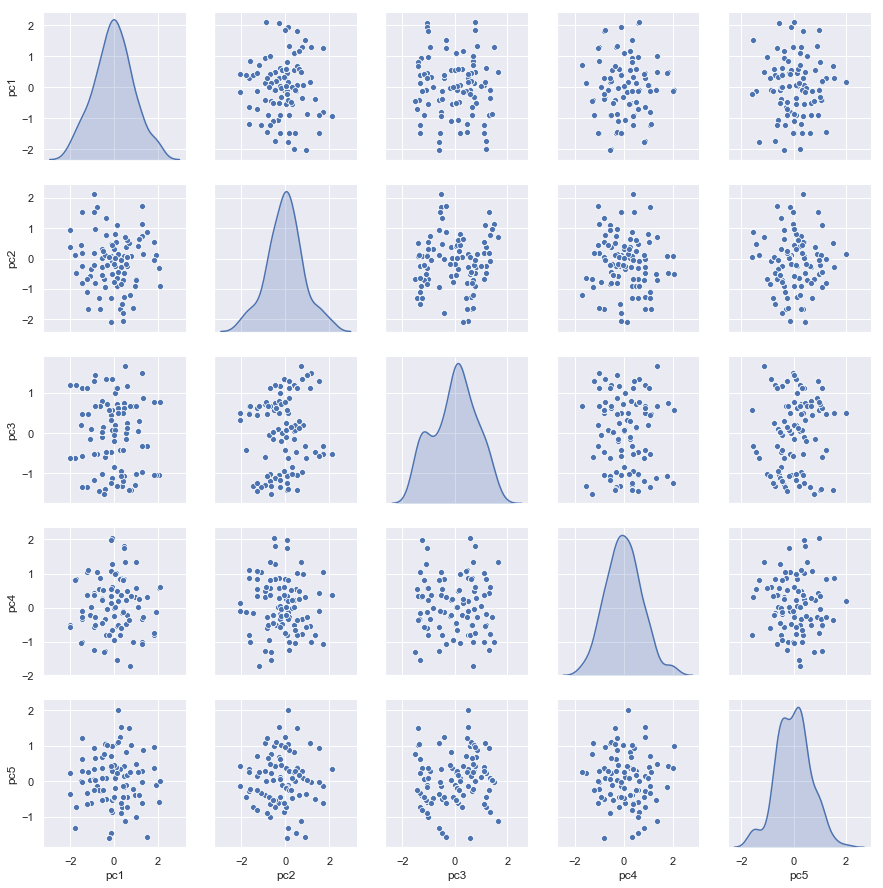

In [23]:
sns.pairplot(X_train_5D,diag_kind='kde')

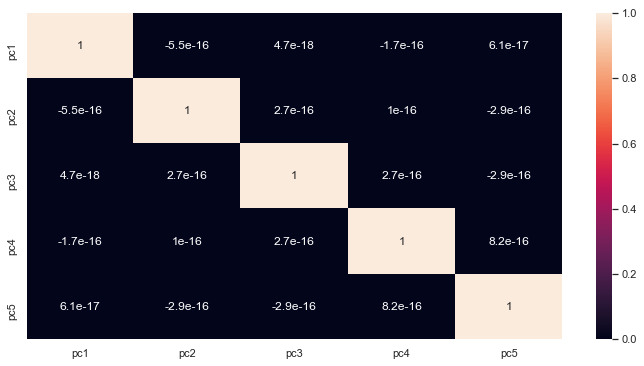

In [24]:
sns.heatmap(X_train_5D.corr(),annot=True)

# Summary after applying PCA 
1. Based on the pair plot it can be infered that there can be 2-3 clusters
2. First 5 components explained the 95% of the variance

# Apply KMeans algorithm on the above transformed data

In [25]:
from sklearn.cluster import KMeans

# Let us check optimal number of clusters-
cluster_range = range( 1, 10)   # expect 3 to 5 clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 100,init='k-means++',random_state=0)
  clusters.fit(X_train_5D)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,608.054095
1,2,505.494859
2,3,433.432206
3,4,380.412076
4,5,343.994628
5,6,313.811159
6,7,287.024240
7,8,263.012840
8,9,246.065751


Text(0.5, 1.0, 'Elbow plot')

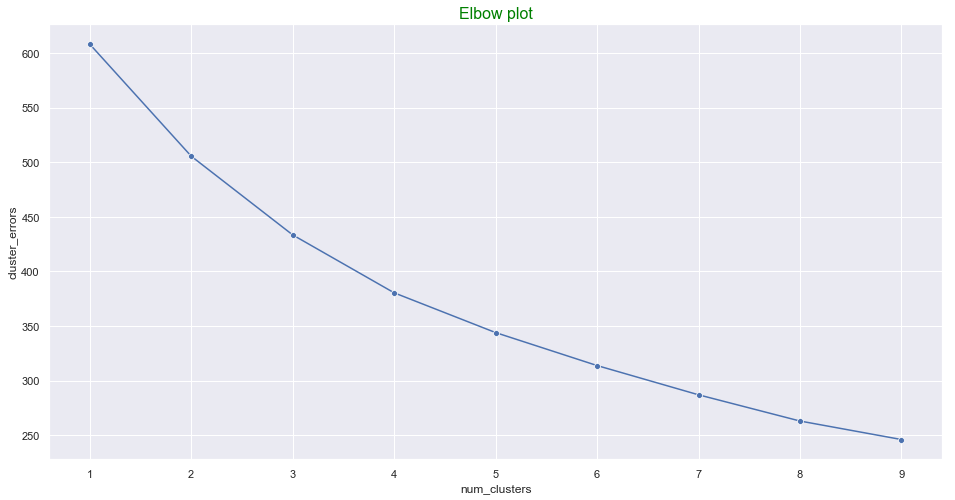

In [26]:
plt.figure(figsize=(16,8))
sns.lineplot(x='num_clusters',y='cluster_errors',data=clusters_df,marker='o')
plt.title('Elbow plot',fontsize=16,color='green')

## Select optimal number of clusters and form clusters out of the train data.

# Create a new column in the train data and populate it with the cluster labels

In [27]:
# Number of clusters
kmeans = KMeans(n_clusters=3,n_init = 100,init='k-means++',random_state=0)
# Fitting the input data
kmeans = kmeans.fit(X_train_5D)
# Getting the cluster labels
labels = kmeans.predict(X_train_5D)
# Centroid values
centroids = kmeans.cluster_centers_
# Comparing with scikit-learn centroids
print("Centroid values")
print("sklearn")
print(centroids) # From sci-kit learn

Centroid values
sklearn
[[ 1.06397034e+00  3.83486995e-01  1.13389550e-01  3.00039452e-02
  -1.26639125e-01]
 [-4.07494005e-01  2.35124695e-01 -9.90896766e-01  1.17244410e-01
   1.46453255e-04]
 [-3.13852815e-01 -3.27995795e-01  4.99503515e-01 -8.12644941e-02
   6.45563402e-02]]


In [28]:
X_train_5D['Labels']=labels
X_train_5D.head()

,pc1,pc2,pc3,pc4,pc5,Labels
0,1.113469,0.404333,0.043497,0.005899,0.253276,0
1,0.342235,-0.051709,-0.926666,0.374128,-0.607584,1
2,2.072996,-0.312290,-1.043815,0.562893,-0.576371,0
3,-0.535648,0.016271,-0.105607,0.245282,0.380657,2
4,0.002904,-0.756336,-0.052050,-0.940752,-0.454968,2


In [29]:
X_train_5D.Labels.unique()

array([0, 1, 2])

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


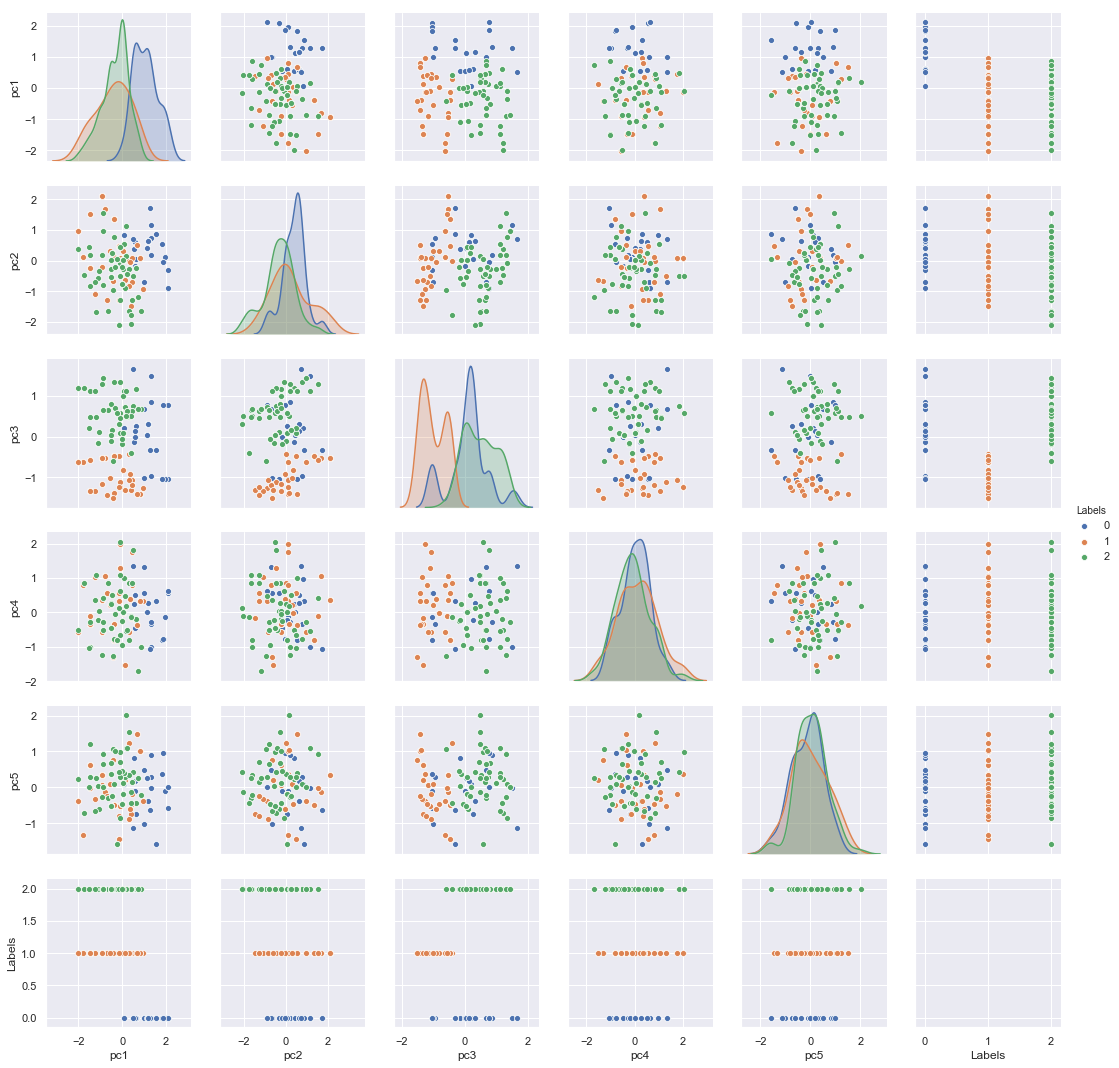

In [30]:
sns.pairplot(data=X_train_5D,diag_kind='kde',hue='Labels')

# Apply SVC model on train dataset and predict target for test dataset.

In [31]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [32]:
scaler=MinMaxScaler() 
svc=SVC()
X_train_scaled=scaler.fit_transform(X_train) 
X_test_scaled=scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [33]:
svc.fit(X_train_scaled,train_labels)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [34]:
y_test_predict=svc.predict(X_test_scaled)
y_test_predict

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0])

# Check accuracy and confusion matrix

In [36]:
print ('Train accuracy score :',accuracy_score(train_labels,svc.predict(X_train_scaled)))

Train accuracy score : 0.964824120603015


Text(0.5, 1.0, 'Confusion matrix of Train data')

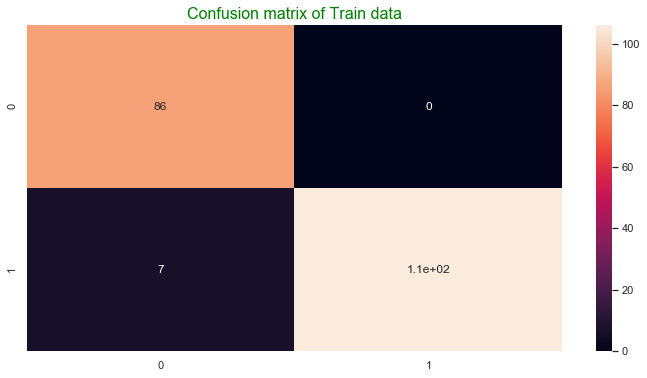

In [37]:
sns.heatmap(confusion_matrix(train_labels,svc.predict(X_train_scaled)),annot=True)
plt.title('Confusion matrix of Train data',fontsize=16,color='green')

In [38]:
print ('Test accuracy score :',accuracy_score(test_labels,y_test_predict))

Test accuracy score : 0.92


Text(0.5, 1.0, 'Confusion matrix of Test data')

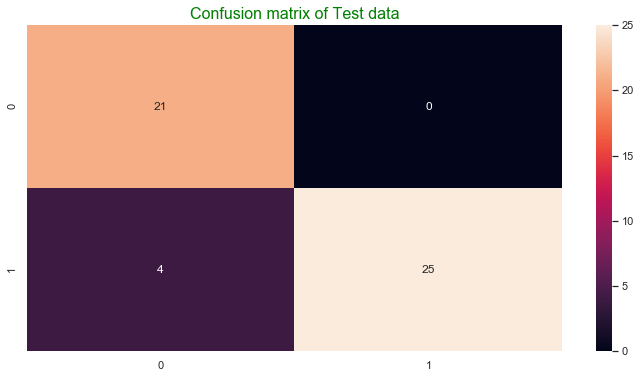

In [39]:
sns.heatmap(confusion_matrix(test_labels,y_test_predict),annot=True)
plt.title('Confusion matrix of Test data',fontsize=16,color='green')